In [1]:
import numpy as np
from itertools import combinations
import os
import mdtraj as md
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.ndimage import gaussian_filter
import pandas as pd
import pytraj as pt
import glob

# PyEmma
import pyemma
import pyemma.msm as msm
import pyemma.plots as mpl
import pyemma.coordinates as coor

In [2]:
def plot_Nice_PES(P_test,bins=90,sigma=0.99, title=False, size = 1):

    mpl.style.use("seaborn-paper")
    plt.figure(figsize=(6*size,5*size))
    alldata=np.vstack(P_test)
    min1=np.min(alldata[:,0])
    max1=np.max(alldata[:,0])
    min2=np.min(alldata[:,1])
    max2=np.max(alldata[:,1])
    
    tickspacing1=1.0
    tickspacing2=1.0
    z,x,y = np.histogram2d(alldata[:,0], alldata[:,1], bins=bins)
    z += 0.1
    
    # compute free energies
    F = -np.log(z)
    
    
    # contour plot
    extent = [x[0], x[-1], y[0], y[-1]]
    
    plt.xticks(np.arange(int(min1), int(max1)+1, tickspacing1),fontsize=10*size)
    plt.yticks(np.arange(int(min2), int(max2)+1, tickspacing2),fontsize=10*size)
    #    sigma = 0.99 # this depends on how noisy your data is, play with it!
    data = gaussian_filter((F.T)*0.592-np.min(F.T)*0.592, sigma)
    levels=np.linspace(0,np.max(data)-0.5,num=10)
    plt.contour(data,colors='black',linestyles='solid',alpha=0.7,cmap=None, cbar=True, levels=levels,extent=extent)
    plt.contourf(data,alpha=0.5,cmap='jet', cbar=True,levels=levels,extent=extent)
    if title:
        plt.title(title, fontsize = 20*size, y=1.02)
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.8)
    cax = plt.axes([0.81, 0.1, 0.02, 0.7])
    plt.colorbar(cax=cax, format='%.1f').set_label('Free energy (kcal/mol)', fontsize=10*size, labelpad=5, y= 0.5)
    cax.axes.tick_params(labelsize=10*size)

In [3]:
directo='/home/miquel/Desktop/Janet/trajs/APO/'
trajfiles_APO=[fi.replace('\\', '/') for fi in glob.glob(directo + '*_super.dcd')]
topfile_APO='/home/miquel/Desktop/Janet/tops/MD_1E2K_APO.pdb'

directo='/home/miquel/Desktop/Janet/trajs/ADP/'
trajfiles_ADP=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_ADP='/home/miquel/Desktop/Janet/tops/MD_1E2K_ADP.pdb'

directo='/home/miquel/Desktop/Janet/trajs/ATP/'
trajfiles_ATP=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_ATP='/home/miquel/Desktop/Janet/tops/MD_1E2K_ATP.pdb'

directo='/home/miquel/Desktop/Janet/trajs/THM/'
trajfiles_THM=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_THM='/home/miquel/Desktop/Janet/tops/MD_1E2K_THM.pdb'

directo='/home/miquel/Desktop/Janet/trajs/GCV/'
trajfiles_GCV=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_GCV='/home/miquel/Desktop/Janet/tops/MD_1E2K_GCV.pdb'

In [59]:
APO = pt.iterload(trajfiles_APO, top=topfile_APO)
ADP = pt.iterload(trajfiles_ADP, top=topfile_ADP)
ATP = pt.iterload(trajfiles_ATP, top=topfile_ATP)
THM = pt.iterload(trajfiles_THM, top=topfile_THM)
GCV = pt.iterload(trajfiles_GCV, top=topfile_GCV)

In [67]:
APO_dists_A_RM = pt.distance(APO, ':40@CA :177@CA')
ADP_dists_A_RM = pt.distance(ADP, ':40@CA :177@CA')
ATP_dists_A_RM = pt.distance(ATP, ':40@CA :177@CA')
THM_dists_A_RM = pt.distance(THM, ':40@CA :177@CA')
GCV_dists_A_RM = pt.distance(GCV, ':40@CA :177@CA')

APO_dists_A_RM = np.hstack(APO_dists_A_RM) #Reformat the output to be 1D array
ADP_dists_A_RM = np.hstack(ADP_dists_A_RM)
ATP_dists_A_RM = np.hstack(ATP_dists_A_RM)
THM_dists_A_RM = np.hstack(THM_dists_A_RM)
GCV_dists_A_RM = np.hstack(GCV_dists_A_RM)
frames = np.array(list(range(len(APO_dists_A_RM))))

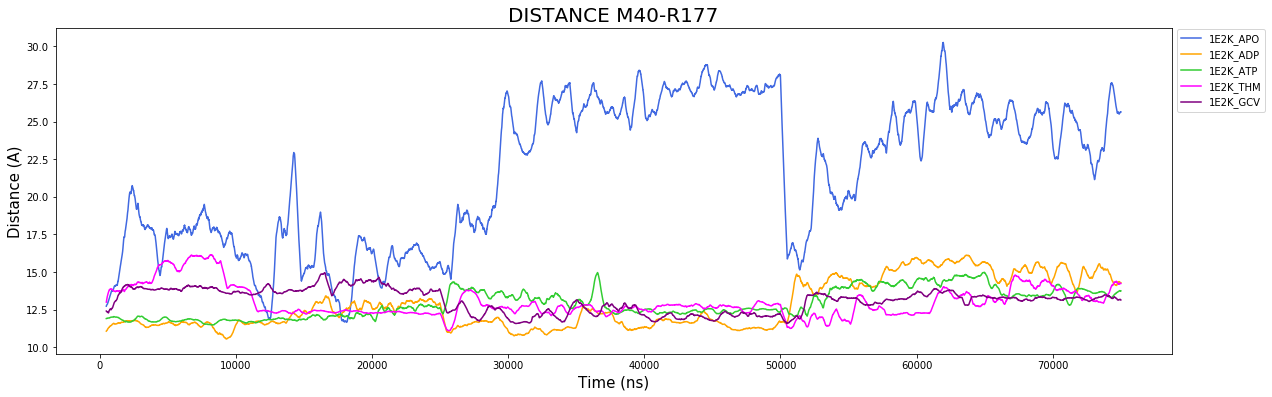

In [68]:
plt.figure(figsize=(20,6))
window = 500

plt.plot(pd.Series(APO_dists_A_RM).rolling(window).mean(), label = '1E2K_APO', color='royalblue', linestyle='-') 
plt.plot(alpha=0.1, color = 'blue')

plt.plot(pd.Series(ADP_dists_A_RM).rolling(window).mean(), label = '1E2K_ADP', color='orange', linestyle='-') 
plt.plot(alpha=0.1, color = 'teal')

plt.plot(pd.Series(ATP_dists_A_RM).rolling(window).mean(), label = '1E2K_ATP', color='limegreen', linestyle='-') 
plt.plot(alpha=0.1, color = 'dimgray')

plt.plot(pd.Series(THM_dists_A_RM).rolling(window).mean(), label = '1E2K_THM', color='magenta', linestyle='-') 
plt.plot(alpha=0.1, color = 'magenta')

plt.plot(pd.Series(GCV_dists_A_RM).rolling(window).mean(), label = '1E2K_GCV', color='purple', linestyle='-') 
plt.plot(alpha=0.1, color = 'purple')

plt.title('DISTANCE M40-R177', fontsize=20)
plt.xlabel('Time (ns)', fontsize=15)
plt.ylabel('Distance (A)', fontsize=15)
plt.legend(bbox_to_anchor=(1.0, 0.81, 0.5, 0.2), loc='upper left')

In [62]:
APO_dists_B_RM = pt.distance(APO, ':371@CB :508@CB')
ADP_dists_B_RM = pt.distance(ADP, ':371@CB :508@CB')
ATP_dists_B_RM = pt.distance(ATP, ':371@CB :508@CB')
THM_dists_B_RM = pt.distance(THM, ':371@CB :508@CB')
GCV_dists_B_RM = pt.distance(GCV, ':371@CB :508@CB')

APO_dists_B_RM = np.hstack(APO_dists_B_RM) #Reformat the output to be 1D array
ADP_dists_B_RM = np.hstack(ADP_dists_B_RM)
ATP_dists_B_RM = np.hstack(ATP_dists_B_RM)
THM_dists_B_RM = np.hstack(THM_dists_B_RM)
GCV_dists_B_RM = np.hstack(GCV_dists_B_RM)
frames = np.array(list(range(len(APO_dists_B_RM))))

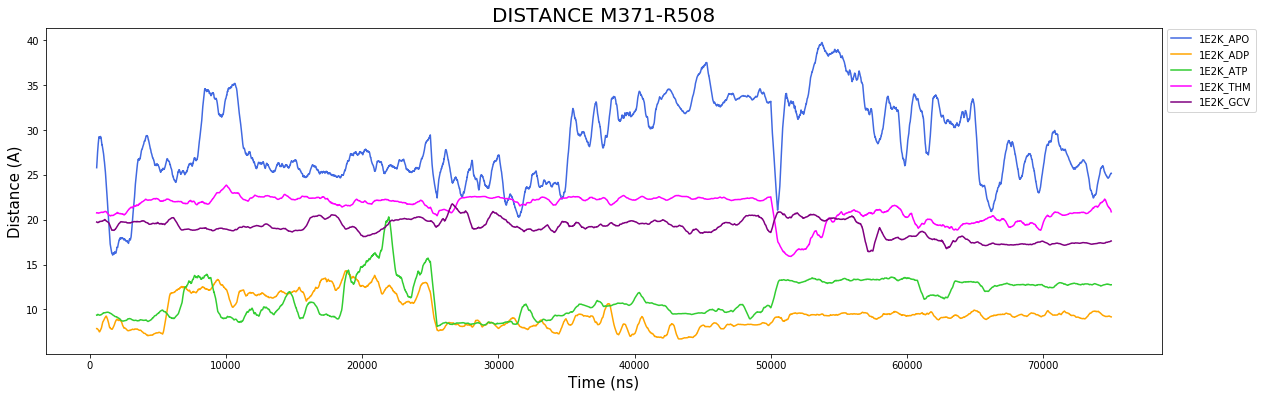

In [63]:
plt.figure(figsize=(20,6))
window = 500

plt.plot(pd.Series(APO_dists_B_RM).rolling(window).mean(), label = '1E2K_APO', color='royalblue', linestyle='-') 
plt.plot(alpha=0.1, color = 'blue')

plt.plot(pd.Series(ADP_dists_B_RM).rolling(window).mean(), label = '1E2K_ADP', color='orange', linestyle='-') 
plt.plot(alpha=0.1, color = 'teal')

plt.plot(pd.Series(ATP_dists_B_RM).rolling(window).mean(), label = '1E2K_ATP', color='limegreen', linestyle='-') 
plt.plot(alpha=0.1, color = 'dimgray')

plt.plot(pd.Series(THM_dists_B_RM).rolling(window).mean(), label = '1E2K_THM', color='magenta', linestyle='-') 
plt.plot(alpha=0.1, color = 'magenta')

plt.plot(pd.Series(GCV_dists_B_RM).rolling(window).mean(), label = '1E2K_GCV', color='purple', linestyle='-') 
plt.plot(alpha=0.1, color = 'purple')

plt.title('DISTANCE M371-R508', fontsize=20)
plt.xlabel('Time (ns)', fontsize=15)
plt.ylabel('Distance (A)', fontsize=15)
plt.legend(bbox_to_anchor=(1.0, 0.81, 0.5, 0.2), loc='upper left')

In [64]:
APO_dists_A_EI = pt.distance(APO, ':52@CB :180@CB')
ADP_dists_A_EI = pt.distance(ADP, ':52@CB :180@CB')
ATP_dists_A_EI = pt.distance(ATP, ':52@CB :180@CB')
THM_dists_A_EI = pt.distance(THM, ':52@CB :180@CB')
GCV_dists_A_EI = pt.distance(GCV, ':52@CB :180@CB')

APO_dists_A_EI = np.hstack(APO_dists_A_EI) #Reformat the output to be 1D array
ADP_dists_A_EI = np.hstack(ADP_dists_A_EI)
ATP_dists_A_EI = np.hstack(ATP_dists_A_EI)
THM_dists_A_EI = np.hstack(THM_dists_A_EI)
GCV_dists_A_EI = np.hstack(GCV_dists_A_EI)
frames = np.array(list(range(len(APO_dists_A_EI))))

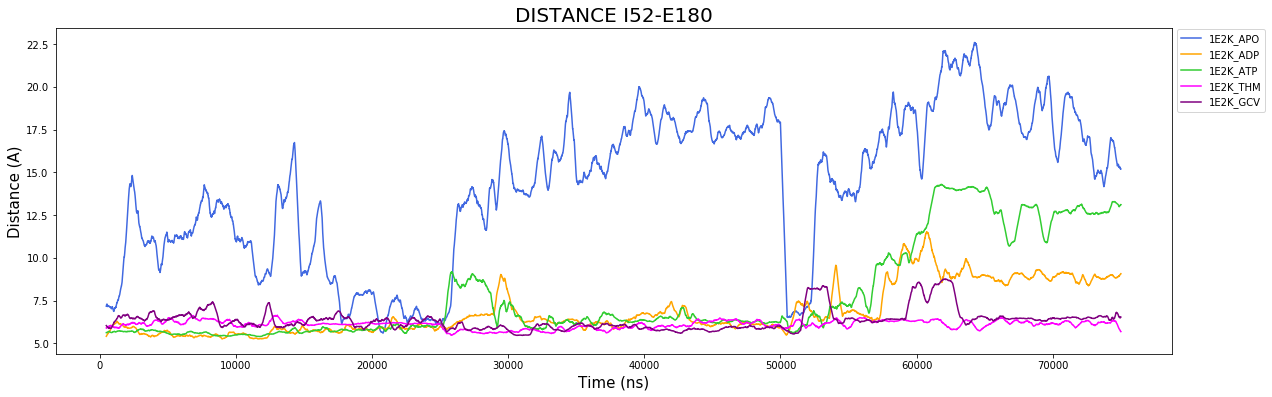

In [65]:
plt.figure(figsize=(20,6))
window = 500

plt.plot(pd.Series(APO_dists_A_EI).rolling(window).mean(), label = '1E2K_APO', color='royalblue', linestyle='-') 
plt.plot(alpha=0.1, color = 'blue')

plt.plot(pd.Series(ADP_dists_A_EI).rolling(window).mean(), label = '1E2K_ADP', color='orange', linestyle='-') 
plt.plot(alpha=0.1, color = 'teal')

plt.plot(pd.Series(ATP_dists_A_EI).rolling(window).mean(), label = '1E2K_ATP', color='limegreen', linestyle='-') 
plt.plot(alpha=0.1, color = 'limegreen')

plt.plot(pd.Series(THM_dists_A_EI).rolling(window).mean(), label = '1E2K_THM', color='magenta', linestyle='-') 
plt.plot(alpha=0.1, color = 'magenta')

plt.plot(pd.Series(GCV_dists_A_EI).rolling(window).mean(), label = '1E2K_GCV', color='purple', linestyle='-') 
plt.plot(alpha=0.1, color = 'purple')

plt.title('DISTANCE I52-E180', fontsize=20)
plt.xlabel('Time (ns)', fontsize=15)
plt.ylabel('Distance (A)', fontsize=15)
plt.legend(bbox_to_anchor=(1.0, 0.81, 0.5, 0.2), loc='upper left')

In [66]:
APO_dists_B_EI = pt.distance(APO, ':383@CB :511@CB')
ADP_dists_B_EI = pt.distance(ADP, ':383@CB :511@CB')
ATP_dists_B_EI = pt.distance(ATP, ':383@CB :511@CB')
THM_dists_B_EI = pt.distance(THM, ':383@CB :511@CB')
GCV_dists_B_EI = pt.distance(GCV, ':383@CB :511@CB')

APO_dists_B_EI = np.hstack(APO_dists_B_EI) #Reformat the output to be 1D array
ADP_dists_B_EI = np.hstack(ADP_dists_B_EI)
ATP_dists_B_EI = np.hstack(ATP_dists_B_EI)
THM_dists_B_EI = np.hstack(THM_dists_B_EI)
GCV_dists_B_EI = np.hstack(GCV_dists_B_EI)
frames = np.array(list(range(len(APO_dists_B_EI))))

TypeError: dispatcher for __array_function__ did not return an iterable

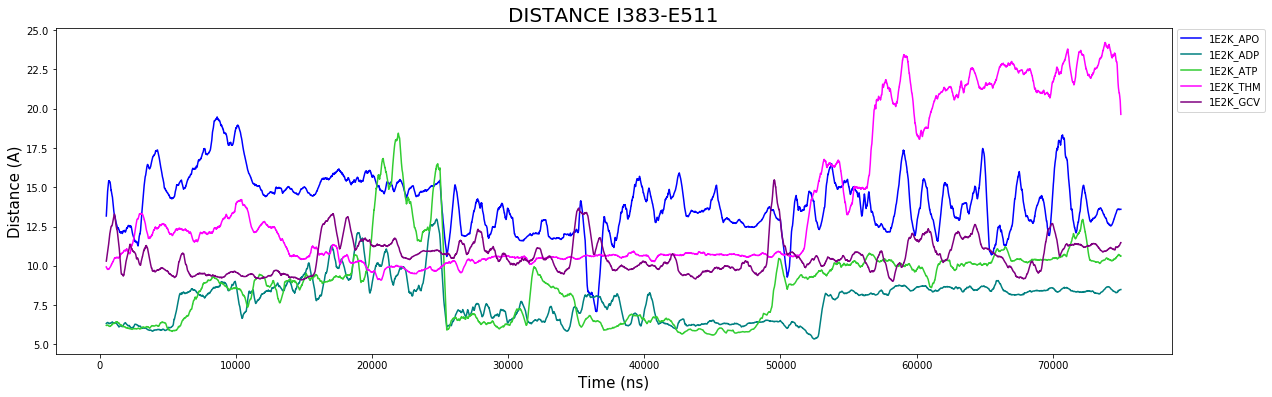

In [53]:
plt.figure(figsize=(20,6))
window = 500
plt.plot(pd.Series(APO_dists_B_EI).rolling(window).mean(), label = '1E2K_APO', color='royalblue', linestyle='-') 
plt.plot(alpha=0.1, color = 'blue')

plt.plot(pd.Series(ADP_dists_B_EI).rolling(window).mean(), label = '1E2K_ADP', color='orange', linestyle='-') 
plt.plot(alpha=0.1, color = 'teal')

plt.plot(pd.Series(ATP_dists_B_EI).rolling(window).mean(), label = '1E2K_ATP', color='limegreen', linestyle='-') 
plt.plot(alpha=0.1, color = 'dimgray')

plt.plot(pd.Series(THM_dists_B_EI).rolling(window).mean(), label = '1E2K_THM', color='magenta', linestyle='-') 
plt.plot(alpha=0.1, color = 'magenta')

plt.plot(pd.Series(GCV_dists_B_EI).rolling(window).mean(), label = '1E2K_GCV', color='purple', linestyle='-') 
plt.plot(alpha=0.1, color = 'purple')

plt.title('DISTANCE I383-E511', fontsize=20)
plt.xlabel('Time (ns)', fontsize=15)
plt.ylabel('Distance (A)', fontsize=15)
plt.legend(bbox_to_anchor=(1.0, 0.81, 0.5, 0.2), loc='upper left')